# Posttest 8 Deeplearn

In [178]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.image import per_image_standardization
from keras import datasets
import matplotlib.pyplot as plt
import numpy as np

# Klasifikasi cifar10

## Load Dataset Dari TensorFlow dan Data Splitting

In [235]:
(x_train_raw,y_train_raw), (x_test_raw,y_test_raw) = datasets.cifar10.load_data()

### Melihat Dataset Beserta Label Image

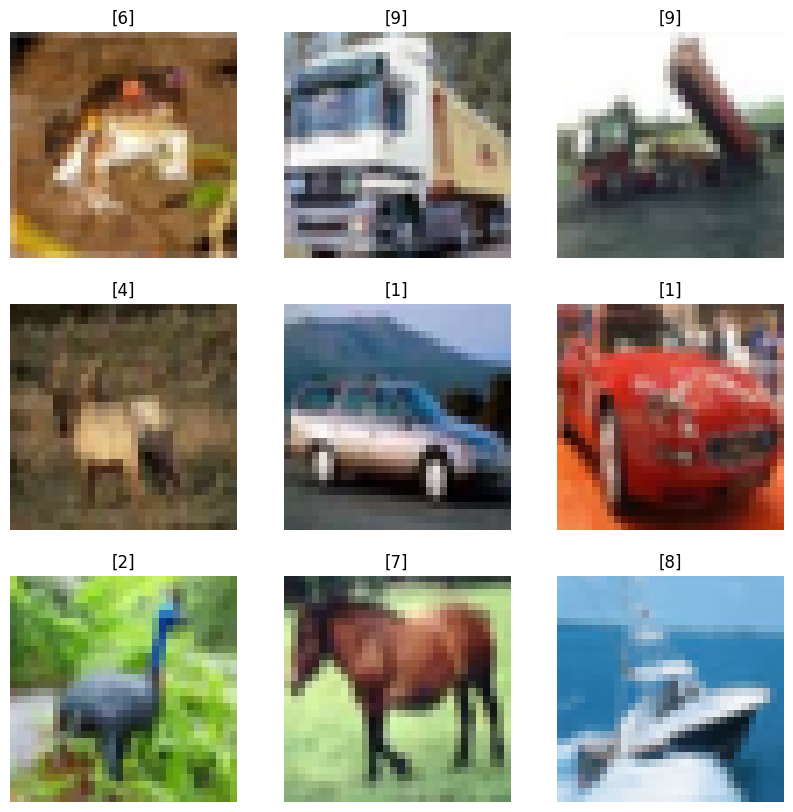

In [237]:
plt.figure(figsize=(10,10))
for i in range (9):
    plt.subplot(3,3,i+1)
    plt.title(y_train_raw[i])
    plt.imshow(x_train_raw[i])
    plt.axis("off")
plt.show()

## Encoding Label

In [236]:
y_train = keras.utils.to_categorical(y_train_raw,10)
y_test = keras.utils.to_categorical(y_test_raw,10)

In [182]:
x_train_raw[0].shape

(32, 32, 3)

### Standarisasi Fitur-fitur

In [183]:
x_train = per_image_standardization(x_train_raw)
x_test = per_image_standardization(x_test_raw)

In [184]:
model_DL = Sequential()

### input layer

In [185]:
model_DL.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model_DL.add(Conv2D(32, (3,3), activation='relu'))
model_DL.add(MaxPooling2D(2,2))
model_DL.add(Conv2D(64, (3,3), activation='relu'))
model_DL.add(Conv2D(64, (3,3), activation='relu'))
model_DL.add(MaxPooling2D(2,2))

### hidden layer

In [186]:
model_DL.add(Flatten())
model_DL.add(Dense(128, activation='relu'))
model_DL.add(Dense(64, activation='relu'))
model_DL.add(Dense(32, activation='relu'))

### Output layer

In [187]:
model_DL.add(Dense(10, activation='softmax'))

### Model Summary

In [188]:
model_DL.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_32 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

## Model Fit

In [189]:
model_DL.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [190]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.75 and logs.get('val_accuracy') > 0.75):
            self.model.stop_training = True

In [191]:
fit = model_DL.fit(
    x_train, y_train, validation_data=(x_test, y_test),
    epochs=10 ,batch_size=32, callbacks=[myCallback()])

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4051 - accuracy: 0.4906 - val_loss: 1.0584 - val_accuracy: 0.6290
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9286 - accuracy: 0.6742 - val_loss: 0.9089 - val_accuracy: 0.6853
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7678 - accuracy: 0.7313 - val_loss: 0.8236 - val_accuracy: 0.7199
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6574 - accuracy: 0.7699 - val_loss: 0.8537 - val_accuracy: 0.7160
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.5745 - accuracy: 0.7995 - val_loss: 0.8389 - val_accuracy: 0.7290
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.4999 - accuracy: 0.8258 - val_loss: 0.7854 - val_accuracy: 0.7437
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.4413 - accuracy: 0.8447 - val_loss: 0.8281 -

## Evaluasi Model

In [192]:
fit.history.keys()

print("Akurasi :",fit.history['accuracy'][-1])
print("Loss :",fit.history['loss'][-1])
print("Val_Akurasi :",fit.history['val_accuracy'][-1])
print("Val_Loss :",fit.history['val_loss'][-1])

Akurasi : 0.8955600261688232
Loss : 0.2976052761077881
Val_Akurasi : 0.7366999983787537
Val_Loss : 0.969063937664032


### Visualisasi Akurasi

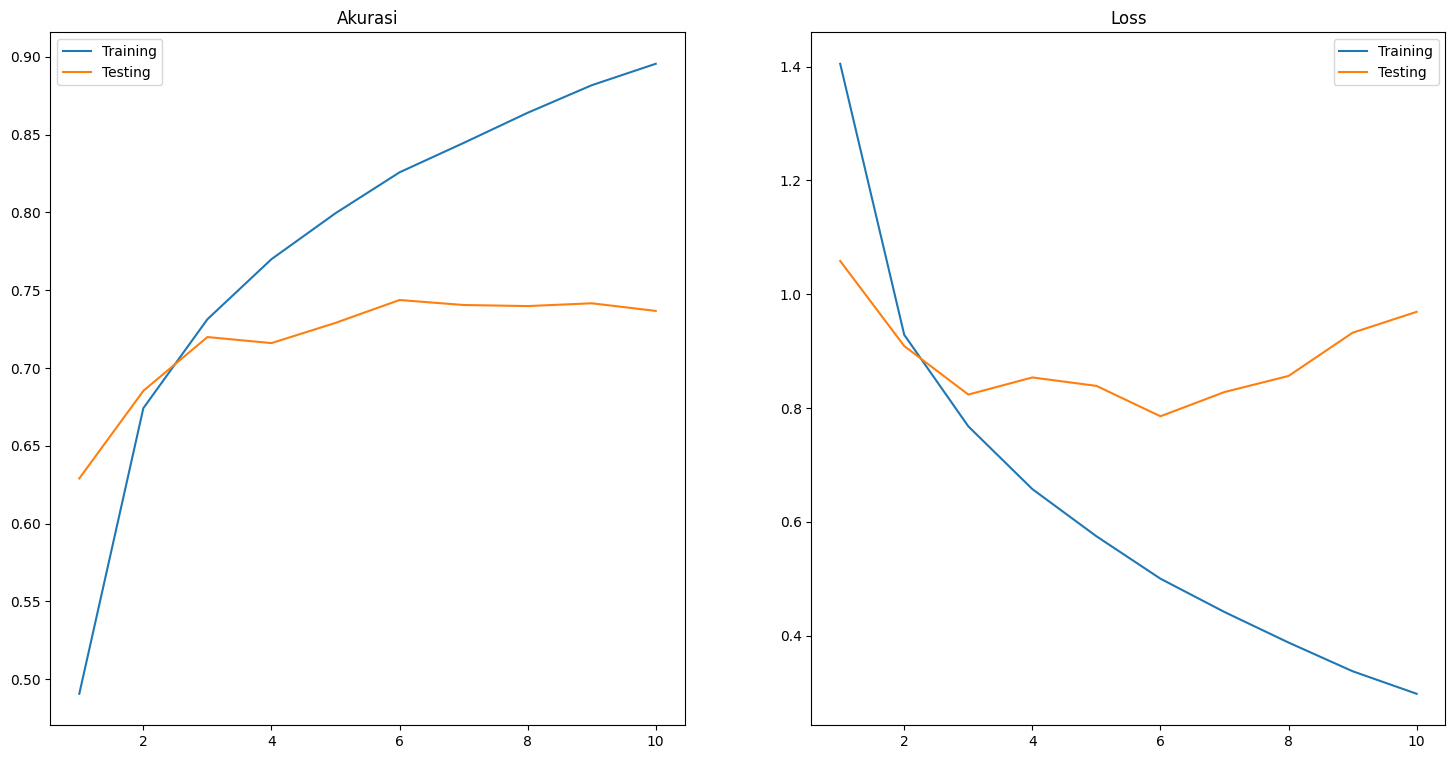

In [194]:
plt.figure(figsize=(18,9))

epochs_run = [i+1 for i in range(10)]

plt.subplot(1,2,1)
plt.plot(epochs_run, fit.history['accuracy'], label='Training')
plt.plot(epochs_run, fit.history['val_accuracy'], label='Testing')
plt.title("Akurasi")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_run, fit.history['loss'], label='Training')
plt.plot(epochs_run, fit.history['val_loss'], label='Testing')
plt.title("Loss")
plt.legend()
          
plt.show()

## Prediksi Gambar Dengan Model

In [212]:
pred = model_DL.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [247]:
hasil_pred = np.argmax(pred, axis=1)

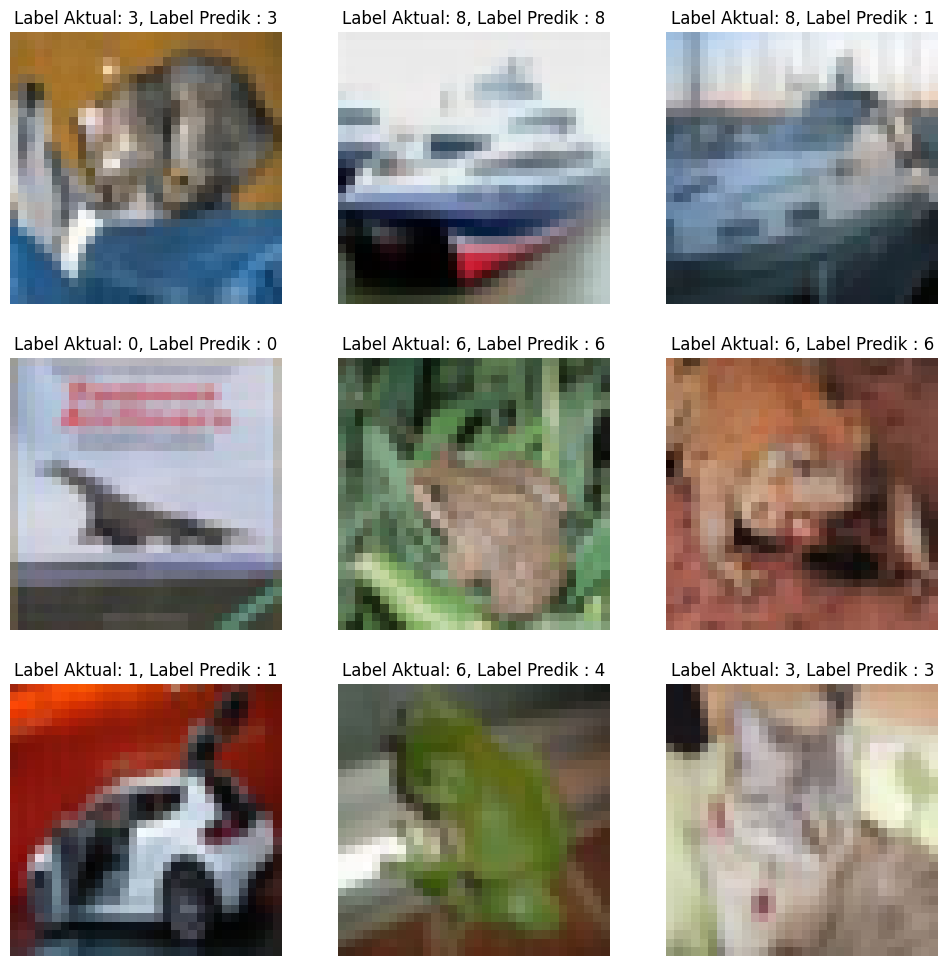

In [249]:
plt.figure(figsize=(12,12))
for i in range(9) :
    plt.subplot(3,3,i+1)
    
    plt.title(f'Label Aktual: {y_test_raw[i][0]}, Label Predik : {hasil_pred[i]}')
    plt.imshow(x_test_raw[i].reshape(32,32,3))
    plt.axis("off")
    
plt.show()